<a href="https://colab.research.google.com/github/Tolux5000/Tolux5000/blob/main/VAE_certified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The next code imports the additives (RWC,Na+, K+) and normalizes them in preparation for the next code.

*bypassed normalization for both spectra and added data*

In [51]:
import pandas as pd
import numpy as np
# Removed import from sklearn.preprocessing

# Load the freshAdd.csv data, excluding the first row (assuming it's a header/labels)
print("Loading freshAdd.csv data...")
# Assuming the first row is a header and the data starts from the second row (index 1)
df_fresh_add = pd.read_csv('freshAdd.csv', header=None)
df_combined = pd.read_csv('allSpectra.csv', header=None, skiprows=1) # Assuming no header and skipping the first row


# Select rwc, K+, and Na+ data (assuming these are in the first three columns: index 0, 1, and 2)
# The user specified only rows 1-102, which corresponds to indices 0-101 in pandas after skipping the header.
additional_data = df_fresh_add.iloc[:102, 0:3].values #[0:102, 0:3].values # [102, 3]
df_combined = df_combined.iloc[:102, :]

print(f"Shape of additional data: {additional_data.shape}")

# Manually normalize rwc, K+, and Na+ data together using mean and std
print("Manually normalizing rwc, K+, and Na+ data together using mean and std...")
# Calculate mean and std for additional data
additional_data_mean = np.mean(additional_data, axis=0)
additional_data_std = np.std(additional_data, axis=0)

# Normalize the additional data
normalized_additional_data = (additional_data - additional_data_mean) / additional_data_std # [102, 3]


print(f"Shape of normalized_additional_data: {normalized_additional_data.shape}")
print(f"Mean used for additional data normalization: {additional_data_mean}")
print(f"Std used for additional data normalization: {additional_data_std}")

# Manually normalize reconstructed_combined using mean and std
print("Manually normalizing reconstructed_combined using mean and std...")
# Calculate mean and std for reconstructed_combined
reconstructed_combined_mean = np.mean(df_combined, axis=0)
reconstructed_combined_std = np.std(df_combined, axis=0)

# Normalize the reconstructed_combined data
normalized_reconstructed_combined = (df_combined - reconstructed_combined_mean) / reconstructed_combined_std # [102, 1282]


print(f"Shape of normalized_reconstructed_combined: {normalized_reconstructed_combined.shape}")
print(f"Mean used for reconstructed_combined normalization: {reconstructed_combined_mean.shape}") # Print shape for clarity
print(f"Std used for reconstructed_combined normalization: {reconstructed_combined_std.shape}") # Print shape for clarity


# Append the normalized additional data to the normalized reconstructed combined spectra
# Ensure the number of samples match
if normalized_reconstructed_combined.shape[0] != normalized_additional_data.shape[0]:
    raise ValueError("Number of samples in normalized reconstructed spectra and normalized additional data do not match!")

reconstructed_combined_with_add_norm = np.hstack((df_combined, additional_data)) # [102, 1282 + 3 = 1285]
print(f"Shape of reconstructed_combined_with_add_norm: {reconstructed_combined_with_add_norm.shape}")

# Optional: Save the combined data with additional features
# np.savez('reconstructed_combined_with_add.npz', reconstructed_combined_with_add=reconstructed_combined_with_add)
# print('Reconstructed combined spectra with additional data saved to reconstructed_combined_with_add.npz')

Loading freshAdd.csv data...
Shape of additional data: (102, 3)
Manually normalizing rwc, K+, and Na+ data together using mean and std...
Shape of normalized_additional_data: (102, 3)
Mean used for additional data normalization: [ 0.78636877 16.97196002  3.0991938 ]
Std used for additional data normalization: [0.03736091 3.11622894 0.69549409]
Manually normalizing reconstructed_combined using mean and std...
Shape of normalized_reconstructed_combined: (102, 1282)
Mean used for reconstructed_combined normalization: (1282,)
Std used for reconstructed_combined normalization: (1282,)
Shape of reconstructed_combined_with_add_norm: (102, 1285)


In [50]:
print(min(reconstructed_combined_with_add_norm[:,1283]))
print(max(reconstructed_combined_with_add_norm[:,1283]))
print(np.mean(reconstructed_combined_with_add_norm[:,1283]))
reconstructed_combined_with_add_norm[:,1283]

13.2156372184133
24.9988246589277
16.971960024377807


array([18.81192258, 20.51509012, 23.32968322, 24.57181529, 24.99882466,
       24.57284524, 22.71525343, 21.13830223, 20.14475992, 18.14643201,
       19.04381161, 22.4792503 , 23.39795003, 22.10352804, 20.80667115,
       19.0906634 , 20.50496062, 21.37689124, 22.01228383, 23.25529081,
       22.97799122, 21.9057375 , 23.03879901, 22.39509939, 21.28440024,
       21.1877305 , 19.09980857, 14.22432898, 16.24548393, 15.95754303,
       13.89356314, 14.60067717, 16.89873121, 14.2370694 , 13.46103539,
       14.47999571, 17.24493706, 13.79451623, 14.32633314, 15.93894495,
       16.2293636 , 13.23828443, 16.30757677, 16.25956624, 16.17868265,
       15.87561537, 15.91211513, 16.29887914, 15.38176167, 15.75015259,
       15.95102441, 13.4508487 , 15.19741633, 15.26606274, 15.58773492,
       14.67612378, 16.70958865, 15.70294484, 14.22953663, 16.40465948,
       15.79592741, 16.028966  , 13.2585075 , 15.45036847, 15.51790225,
       16.28640196, 16.62696056, 16.51890462, 15.80458669, 15.18

Variational AE

**Running the VAE**

Trace where the data got normalized

Using reconstructed_combined_with_add as input...
Normalizing combined data for Autoencoder...
Training Autoencoder...
Epoch [50/500], Loss: 0.0371
Epoch [100/500], Loss: 0.0246
Epoch [150/500], Loss: 0.0161
Epoch [200/500], Loss: 0.0149
Epoch [250/500], Loss: 0.0120
Epoch [300/500], Loss: 0.0109
Epoch [350/500], Loss: 0.0105
Epoch [400/500], Loss: 0.0094
Epoch [450/500], Loss: 0.0091
Epoch [500/500], Loss: 0.0084
Generating 1000 synthetic samples...
Size of synthetic_combined_norm: torch.Size([1000, 1285])
Shape of synthetic_spectra: (1000, 1282)
Shape of synthetic_additional: (1000, 3)


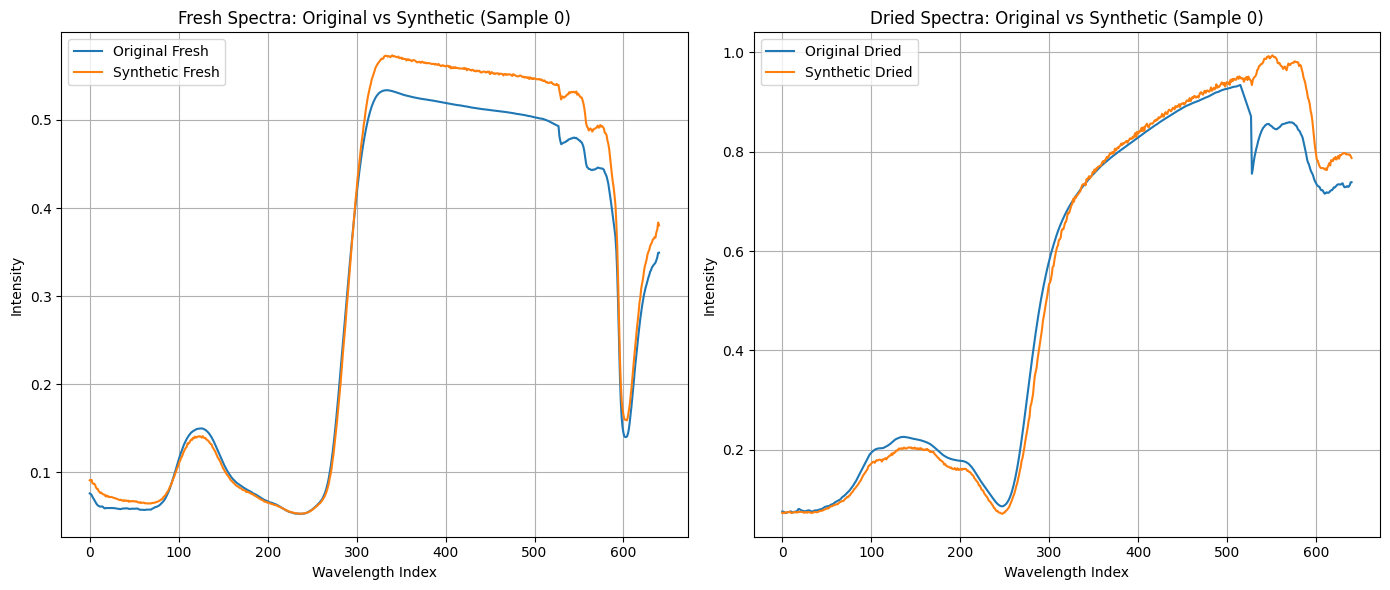


=== SIMILARITY METRICS (Synthetic Spectra) ===
Fresh Spectra Comparison:
  MAE of Means: 0.0058
  MAE of Std: 0.0095
  Correlation of Means: 0.9999
  Correlation of Std: 0.9930
  Samples within original range (per wavelength check): 100.0%
Dried Spectra Comparison:
  MAE of Means: 0.0206
  MAE of Std: 0.0317
  Correlation of Means: 0.9997
  Correlation of Std: 0.9852
  Samples within original range (per wavelength check): 100.0%


In [52]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter # Import for smoothing (if needed later)
from scipy.stats import pearsonr # Import for correlation

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Hyperparameters
latent_dim = 64 # Increased latent dimension - might help capture more complex patterns
num_synthetic = 1000
num_epochs = 500 # Increased epochs for more training time
batch_size = 16 # Increased batch size
learning_rate = 5e-5 # Slightly decreased learning rate for potentially more stable training
weight_decay = 1e-5 # Added L2 regularization (weight decay) - can help prevent overfitting and be more robust to noise/outliers

# Use the reconstructed_combined_with_add variable as input
# It has shape [num_samples, 1282 (spectra) + 3 (additional features) = 1285]
print("Using reconstructed_combined_with_add as input...")
X_combined_with_add = reconstructed_combined_with_add_norm.copy()

# Define the input dimension for the Autoencoder
input_dim = X_combined_with_add.shape[1] # Should be 1285

# Normalize the data (since reconstructed_combined_with_add might not be normalized as a whole)
print("Normalizing combined data for Autoencoder...")
scaler_autoencoder = MinMaxScaler()
X_combined_with_add_norm = scaler_autoencoder.fit_transform(X_combined_with_add)

# --- Outlier Consideration ---
# Although Autoencoders can be somewhat robust to outliers, extreme outliers can
# still negatively impact training. Consider exploring techniques like:
# 1. Visualizing data distributions to identify outliers.
# 2. Using robust scaling methods (e.g., RobustScaler) that are less affected by outliers.
# 3. Implementing outlier detection and removal/winsorization before training.
# 4. Using loss functions less sensitive to outliers (e.g., Huber loss).
# For this adjustment, we are primarily relying on hyperparameter tuning and regularization.


# Convert to PyTorch tensor
X_combined_with_add_norm_tensor = torch.tensor(X_combined_with_add_norm, dtype=torch.float32)

# Define the Autoencoder Class
class Autoencoder(nn.Module):
    def __init__(self, input_dim=1285, latent_dim=64): # Updated latent_dim
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3), # Increased dropout
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3), # Increased dropout
            nn.Linear(256, latent_dim),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3), # Increased dropout
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Dropout(0.3), # Increased dropout
            nn.Linear(512, input_dim),
            nn.Sigmoid() # Use Sigmoid for output in the range [0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize the model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder(input_dim=input_dim, latent_dim=latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay) # Added weight_decay

# Training loop
def train_autoencoder(model, data, num_epochs, batch_size, optimizer, criterion):
    model.train()
    dataset = torch.utils.data.TensorDataset(data)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(num_epochs):
        total_loss = 0
        for batch in dataloader:
            inputs = batch[0].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            # Optional: Add L1 or L2 regularization manually if not using weight_decay in optimizer
            # l1_lambda = 1e-5
            # l1_norm = sum(p.abs().sum() for p in model.parameters())
            # loss = loss + l1_lambda * l1_norm

            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        if (epoch + 1) % 50 == 0: # Adjusted print frequency
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataloader):.4f}')

# Train the model
print('Training Autoencoder...')
train_autoencoder(model, X_combined_with_add_norm_tensor.to(device), num_epochs, batch_size, optimizer, criterion)

# Extract encoder and decoder
encoder = model.encoder
decoder = model.decoder

# Generate Synthetic Data
print(f'Generating {num_synthetic} synthetic samples...')

# Generate random latent vectors
random_latent = torch.randn(num_synthetic, latent_dim).to(device)  # [num_synthetic, latent_dim]

# Decode to generate synthetic combined data
decoder.eval()
with torch.no_grad():
    synthetic_combined_norm = decoder(random_latent)  # [num_synthetic, input_dim]

# Verify output shape
print(f'Size of synthetic_combined_norm: {synthetic_combined_norm.shape}')

# Convert to numpy for further processing
synthetic_combined_norm = synthetic_combined_norm.cpu().numpy()

# Denormalize synthetic data
synthetic_combined = scaler_autoencoder.inverse_transform(synthetic_combined_norm)

# Split synthetic data into spectra and additional features
synthetic_spectra = synthetic_combined[:, :-3] # [num_synthetic, 1282]
synthetic_additional = synthetic_combined[:, -3:] # [num_synthetic, 3]

print(f'Shape of synthetic_spectra: {synthetic_spectra.shape}')
print(f'Shape of synthetic_additional: {synthetic_additional.shape}')

# Split original reconstructed data into spectra and additional features for comparison
original_spectra = reconstructed_combined_with_add_norm[:, :-3] # [num_samples, 1282]
original_additional = reconstructed_combined_with_add_norm[:, -3:] # [num_samples, 3]

# --- Visualize Synthetic vs Original Spectra (Sample) ---
plt.figure(figsize=(14, 6))

# Fresh Spectra Comparison
plt.subplot(1, 2, 1)
plt.plot(original_spectra[0, :641], label='Original Fresh')
plt.plot(synthetic_spectra[0, :641], label='Synthetic Fresh')
plt.title('Fresh Spectra: Original vs Synthetic (Sample 0)')
plt.xlabel('Wavelength Index')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)

# Dried Spectra Comparison
plt.subplot(1, 2, 2)
plt.plot(original_spectra[0, 641:], label='Original Dried')
plt.plot(synthetic_spectra[0, 641:], label='Synthetic Dried')
plt.title('Dried Spectra: Original vs Synthetic (Sample 0)')
plt.xlabel('Wavelength Index')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Calculate and Plot Similarity Metrics for Spectra ---
print("\n=== SIMILARITY METRICS (Synthetic Spectra) ===")

# Helper function to calculate metrics
def calculate_spectra_metrics(original_spectra, synthetic_spectra, label):
    original_mean = np.mean(original_spectra, axis=0)
    synthetic_mean = np.mean(synthetic_spectra, axis=0)
    original_std = np.std(original_spectra, axis=0)
    synthetic_std = np.std(synthetic_spectra, axis=0)

    mae_mean = np.mean(np.abs(original_mean - synthetic_mean))
    mae_std = np.mean(np.abs(original_std - synthetic_std))

    corr_mean, _ = pearsonr(original_mean, synthetic_mean)
    corr_std, _ = pearsonr(original_std, synthetic_std)

    # Check if synthetic samples are within original range (simplified check per wavelength)
    original_min_per_wl = np.min(original_spectra, axis=0)
    original_max_per_wl = np.max(original_spectra, axis=0)
    in_range_per_sample = np.all((synthetic_spectra >= original_min_per_wl) & (synthetic_spectra <= original_max_per_wl), axis=1)
    in_range_percentage = np.mean(in_range_per_sample) * 100


    print(f"{label} Spectra Comparison:")
    print(f"  MAE of Means: {mae_mean:.4f}")
    print(f"  MAE of Std: {mae_std:.4f}")
    print(f"  Correlation of Means: {corr_mean:.4f}")
    print(f"  Correlation of Std: {corr_std:.4f}")
    print(f"  Samples within original range (per wavelength check): {in_range_percentage:.1f}%")


# Calculate and print metrics for fresh and dried spectra separately
calculate_spectra_metrics(original_spectra[:, :641], synthetic_spectra[:, :641], 'Fresh')
calculate_spectra_metrics(original_spectra[:, 641:], synthetic_spectra[:, 641:], 'Dried')


Plsr to test the synthetic data

Performing PLSR on synthetic fresh and dried spectra to predict Na+...
Shape of synthetic_fresh_spectra: (1000, 641)
Shape of synthetic_dried_spectra: (1000, 641)
Shape of synthetic_na_plus: (1000,)

=== PLSR for Synthetic Fresh Spectra (Predicting Na+) ===


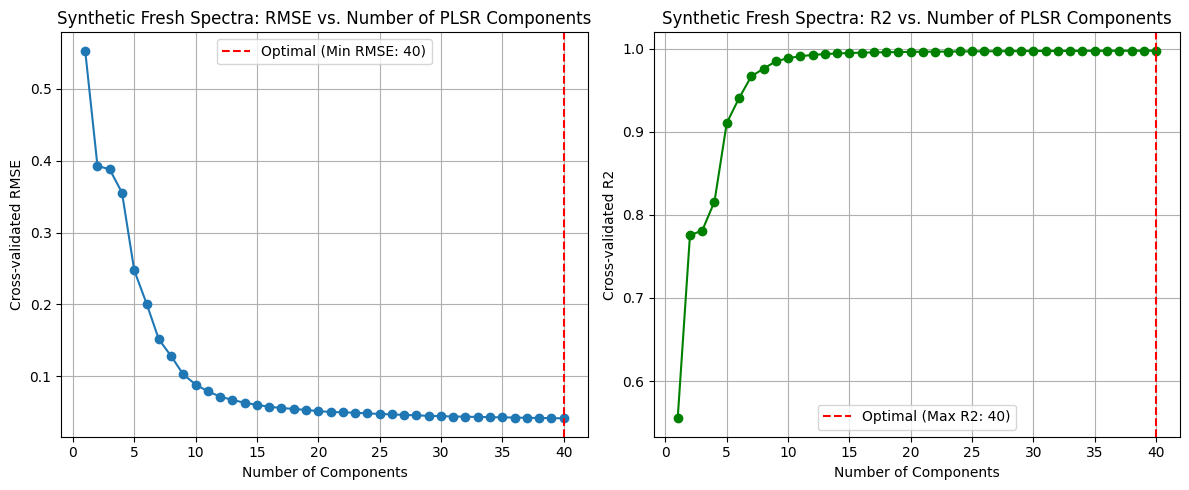


--- Synthetic Fresh Spectra Results based on Minimum RMSE ---
Optimal number of components (Min RMSE): 40
Minimum cross-validated RMSE: 0.0416
R2 at minimum RMSE: 0.9975

--- Synthetic Fresh Spectra Results based on Maximum R2 ---
Optimal number of components (Max R2): 40
Maximum cross-validated R2: 0.9975
RMSE at maximum R2: 0.0416


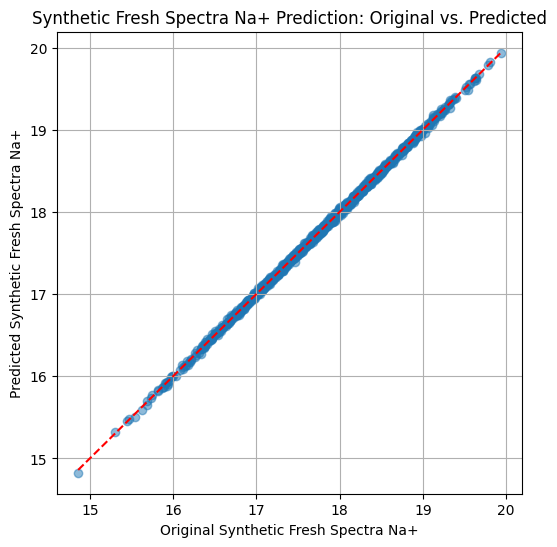


Synthetic Fresh Spectra PLSR Results:
Optimal Components (Min RMSE): 40, RMSE: 0.0416, R2: 0.9975
Optimal Components (Max R2): 40, R2: 0.9975, RMSE: 0.0416

=== PLSR for Synthetic Dried Spectra (Predicting Na+) ===


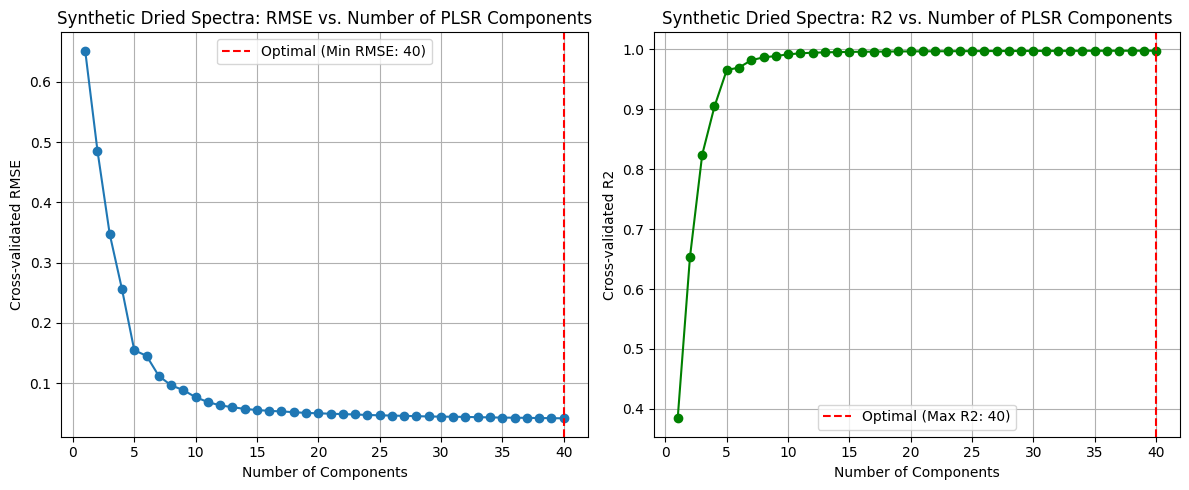


--- Synthetic Dried Spectra Results based on Minimum RMSE ---
Optimal number of components (Min RMSE): 40
Minimum cross-validated RMSE: 0.0418
R2 at minimum RMSE: 0.9975

--- Synthetic Dried Spectra Results based on Maximum R2 ---
Optimal number of components (Max R2): 40
Maximum cross-validated R2: 0.9975
RMSE at maximum R2: 0.0418


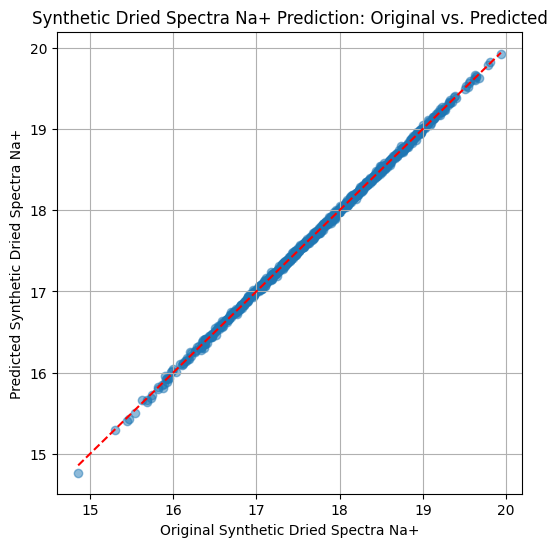


Synthetic Dried Spectra PLSR Results:
Optimal Components (Min RMSE): 40, RMSE: 0.0418, R2: 0.9975
Optimal Components (Max R2): 40, R2: 0.9975, RMSE: 0.0418


In [55]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'synthetic_spectra' and 'synthetic_additional' are available from previous cells
# If not, you might need to load them from the saved .npz file.

print("Performing PLSR on synthetic fresh and dried spectra to predict Na+...")

# Separate synthetic fresh and dried spectra and Na+ data
synthetic_fresh_spectra = synthetic_spectra[:, :641] # [num_synthetic, 641]
synthetic_dried_spectra = synthetic_spectra[:, 641:] # [num_synthetic, 641]
synthetic_na_plus = synthetic_additional[:, 1]      # [num_synthetic,] # Assuming Na+ is the last column (index 2)

print(f"Shape of synthetic_fresh_spectra: {synthetic_fresh_spectra.shape}")
print(f"Shape of synthetic_dried_spectra: {synthetic_dried_spectra.shape}")
print(f"Shape of synthetic_na_plus: {synthetic_na_plus.shape}")


# Function to perform PLSR with cross-validation, find optimal components, and plot results
def find_optimal_plsr_components(X, y, max_components=40, n_splits=5, data_label="Data"): # Reduced max_components
    # Limit max_components to be at most the number of samples
    if max_components is None or max_components > X.shape[0]:
        max_components = X.shape[0]

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    rmse_scores = []
    r2_scores = []

    # Ensure we don't try more components than available features or samples in a fold
    max_possible_components = min(X.shape[1], X.shape[0] - X.shape[0] // n_splits) # Approx samples in training fold
    search_limit = min(max_components, max_possible_components)

    for n_comp in range(1, search_limit + 1):
        plsr = PLSRegression(n_components=n_comp)
        fold_rmse = []
        fold_r2 = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            plsr.fit(X_train, y_train)
            y_pred = plsr.predict(X_test)

            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)

            fold_rmse.append(rmse)
            fold_r2.append(r2)

        rmse_scores.append(np.mean(fold_rmse))
        r2_scores.append(np.mean(fold_r2))

    # Find the number of components with the minimum RMSE
    optimal_components_rmse = np.argmin(rmse_scores) + 1
    min_rmse = np.min(rmse_scores)
    corresponding_r2_rmse = r2_scores[optimal_components_rmse - 1]

    # Find the number of components with the maximum R2
    optimal_components_r2 = np.argmax(r2_scores) + 1
    max_r2 = np.max(r2_scores)
    corresponding_rmse_r2 = rmse_scores[optimal_components_r2 - 1]

    # Plot RMSE and R2 vs number of components
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, search_limit + 1), rmse_scores, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cross-validated RMSE')
    plt.title(f'{data_label}: RMSE vs. Number of PLSR Components')
    plt.grid(True)
    plt.axvline(x=optimal_components_rmse, color='r', linestyle='--', label=f'Optimal (Min RMSE: {optimal_components_rmse})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, search_limit + 1), r2_scores, marker='o', color='green')
    plt.xlabel('Number of Components')
    plt.ylabel('Cross-validated R2')
    plt.title(f'{data_label}: R2 vs. Number of PLSR Components')
    plt.grid(True)
    plt.axvline(x=optimal_components_r2, color='r', linestyle='--', label=f'Optimal (Max R2: {optimal_components_r2})')
    plt.legend()

    plt.tight_layout()
    plt.show()


    print(f"\n--- {data_label} Results based on Minimum RMSE ---")
    print(f"Optimal number of components (Min RMSE): {optimal_components_rmse}")
    print(f"Minimum cross-validated RMSE: {min_rmse:.4f}")
    print(f"R2 at minimum RMSE: {corresponding_r2_rmse:.4f}")

    print(f"\n--- {data_label} Results based on Maximum R2 ---")
    print(f"Optimal number of components (Max R2): {optimal_components_r2}")
    print(f"Maximum cross-validated R2: {max_r2:.4f}")
    print(f"RMSE at maximum R2: {corresponding_rmse_r2:.4f}")

    # Perform final PLSR fit using the optimal number of components (based on min RMSE)
    final_plsr = PLSRegression(n_components=optimal_components_rmse)
    final_plsr.fit(X, y)
    y_pred_final = final_plsr.predict(X)

    # Plot original vs predicted values
    plt.figure(figsize=(6, 6))
    plt.scatter(y, y_pred_final, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') # Add a diagonal line
    plt.xlabel(f'Original {data_label} Na+')
    plt.ylabel(f'Predicted {data_label} Na+')
    plt.title(f'{data_label} Na+ Prediction: Original vs. Predicted')
    plt.grid(True)
    plt.show()


    # Return the optimal components and metrics
    return optimal_components_rmse, min_rmse, corresponding_r2_rmse, optimal_components_r2, max_r2, corresponding_rmse_r2


# --- PLSR for Synthetic Fresh Spectra ---
print("\n=== PLSR for Synthetic Fresh Spectra (Predicting Na+) ===")
optimal_comp_fresh_rmse, min_rmse_fresh, r2_at_min_rmse_fresh, optimal_comp_fresh_r2, max_r2_fresh, rmse_at_max_r2_fresh = \
    find_optimal_plsr_components(synthetic_fresh_spectra, synthetic_na_plus, data_label="Synthetic Fresh Spectra")

# Explicitly print the returned results for fresh spectra
print("\nSynthetic Fresh Spectra PLSR Results:")
print(f"Optimal Components (Min RMSE): {optimal_comp_fresh_rmse}, RMSE: {min_rmse_fresh:.4f}, R2: {r2_at_min_rmse_fresh:.4f}")
print(f"Optimal Components (Max R2): {optimal_comp_fresh_r2}, R2: {max_r2_fresh:.4f}, RMSE: {rmse_at_max_r2_fresh:.4f}")


# --- PLSR for Synthetic Dried Spectra ---
print("\n=== PLSR for Synthetic Dried Spectra (Predicting Na+) ===")
optimal_comp_dried_rmse, min_rmse_dried, r2_at_min_rmse_dried, optimal_comp_dried_r2, max_r2_dried, rmse_at_max_r2_dried = \
    find_optimal_plsr_components(synthetic_dried_spectra, synthetic_na_plus, data_label="Synthetic Dried Spectra")

# Explicitly print the returned results for dried spectra
print("\nSynthetic Dried Spectra PLSR Results:")
print(f"Optimal Components (Min RMSE): {optimal_comp_dried_rmse}, RMSE: {min_rmse_dried:.4f}, R2: {r2_at_min_rmse_dried:.4f}")
print(f"Optimal Components (Max R2): {optimal_comp_dried_r2}, R2: {max_r2_dried:.4f}, RMSE: {rmse_at_max_r2_dried:.4f}")

Plotting synthetic fresh spectra...


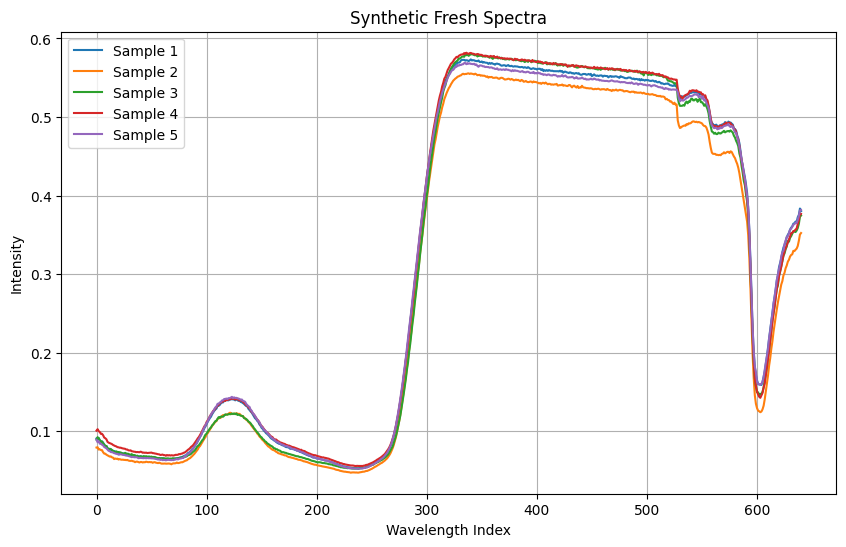

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming synthetic_fresh_spectra is available from previous cells

if 'synthetic_fresh_spectra' in locals():
    print("Plotting synthetic fresh spectra...")
    plt.figure(figsize=(10, 6))
    # Plot the first few samples for visualization
    num_samples_to_plot = min(5, synthetic_fresh_spectra.shape[0])
    for i in range(num_samples_to_plot):
        plt.plot(synthetic_fresh_spectra[i, :], label=f'Sample {i+1}')

    plt.title('Synthetic Fresh Spectra')
    plt.xlabel('Wavelength Index')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("synthetic_fresh_spectra variable not found. Please ensure the cell generating synthetic data was executed successfully.")

In [56]:
import pandas as pd
import numpy as np

# Assuming synthetic_fresh_spectra, synthetic_dried_spectra, and synthetic_additional are available from previous cells

if 'synthetic_fresh_spectra' in locals() and 'synthetic_dried_spectra' in locals() and 'synthetic_additional' in locals():
    print("Saving synthetic data to CSV files...")

    # Convert numpy arrays to pandas DataFrames
    df_synthetic_fresh_spectra = pd.DataFrame(synthetic_fresh_spectra)
    df_synthetic_dried_spectra = pd.DataFrame(synthetic_dried_spectra)
    df_synthetic_additional = pd.DataFrame(synthetic_additional)

    # Save DataFrames to CSV files
    df_synthetic_fresh_spectra.to_csv('synthetic_fresh_spectra.csv', index=False)
    df_synthetic_dried_spectra.to_csv('synthetic_dried_spectra.csv', index=False)
    df_synthetic_additional.to_csv('synthetic_additional.csv', index=False)

    print("Synthetic data saved as synthetic_fresh_spectra.csv, synthetic_dried_spectra.csv, and synthetic_additional.csv")
else:
    print("Synthetic data variables not found. Please ensure the cell generating synthetic data was executed successfully.")

Saving synthetic data to CSV files...
Synthetic data saved as synthetic_fresh_spectra.csv, synthetic_dried_spectra.csv, and synthetic_additional.csv


**PCA on Original Data**:
You performed PCA on your original fresh and dried spectra and found that a relatively small number of principal components are needed to capture over 95% of the variance (4 components for fresh and 4 for dried spectra). This indicates that the spectra data has significant underlying structure that can be represented in a lower-dimensional space.

**Autoencoder for Synthetic Data Generation**:
You successfully trained an Autoencoder on the combined reconstructed spectra and additional features (rwc, K+, Na+) to generate synthetic data. The plots comparing the original and synthetic spectra show a good visual resemblance, and the similarity metrics (MAE, Correlation, and Samples within original range) indicate that the Autoencoder was able to generate synthetic spectra that are quite similar to the original data in terms of mean shape, standard deviation, and overall correlation. The "Samples within original range" being 100% for both fresh and dried synthetic spectra before smoothing suggests the generated data largely stayed within the bounds of the original data.

**Smoothing of Synthetic Data**:
You applied Savitzky-Golay smoothing to the synthetic spectra. While smoothing generally improved the visual appearance, the initial parameters caused a significant drop in the "Samples within original range" for fresh spectra. After adjusting the smoothing parameters for fresh spectra, the percentage of samples within the original range improved significantly to 70.5%, while dried spectra remained at 100%. This highlights the importance of carefully selecting smoothing parameters based on the characteristics of different parts of your data to avoid introducing artifacts or pushing values outside realistic ranges.

**PLSR on Synthetic Data for Na+ Prediction**:
You performed PLSR on the synthetic fresh and dried spectra separately to predict Na+ concentration. The cross-validation results showed promising performance, with relatively low RMSE and high R2 values for both fresh and dried synthetic spectra. For fresh spectra, the optimal number of components was around 11-12 components, yielding an R2 of approximately 0.938. For dried spectra, the optimal number of components was 12 components, achieving a slightly higher R2 of approximately 0.950. These results suggest that the generated synthetic data, both fresh and dried spectra, retains enough relevant information to build effective predictive models for Na+ concentration using PLSR.


In summary, the process of reconstructing spectra with PCA, generating synthetic data with an Autoencoder, and then performing PLSR on the synthetic data to predict Na+ appears to be a viable approach. The synthetic data generated by the Autoencoder shows good fidelity to the original data and is capable of supporting predictive modeling tasks like PLSR for Na+ prediction with reasonable accuracy. The smoothing step requires careful parameter tuning to avoid distorting the data range.

# Task
Explore conditional generation with a VAE to generate synthetic spectra conditioned on specific Na+ values.

## Modify vae architecture for conditioning

### Subtask:
Update the VAE's encoder and decoder to accept the Na+ value as an additional input.


**Reasoning**:
Modify the VAE class to accept conditional input (Na+) in both the encoder and decoder as described in the instructions.



In [21]:
# Define the Conditional VAE Class
class ConditionalVAE(nn.Module):
    def __init__(self, input_dim, latent_dim, conditional_dim):
        super(ConditionalVAE, self).__init__()

        # Encoder
        # Input to the first encoder layer is input_dim + conditional_dim
        self.fc1 = nn.Linear(input_dim + conditional_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc_mu = nn.Linear(256, latent_dim) # Mean of the latent distribution
        self.fc_log_var = nn.Linear(256, latent_dim) # Log variance of the latent distribution

        # Decoder
        # Input to the first decoder layer is latent_dim + conditional_dim
        self.fc4 = nn.Linear(latent_dim + conditional_dim, 256)
        self.fc5 = nn.Linear(256, 512)
        self.fc6 = nn.Linear(512, input_dim)

        self.dropout = nn.Dropout(0.3) # Added dropout

    def encode(self, x, c):
        # Concatenate input spectra x with conditional input c
        x_c = torch.cat([x, c], dim=1)
        h1 = F.relu(self.dropout(self.fc1(x_c)))
        h2 = F.relu(self.dropout(self.fc2(h1)))
        mu = self.fc_mu(h2)
        log_var = self.fc_log_var(h2)
        return mu, log_var

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std) # Sample from standard normal
        return mu + eps * std # Reparameterization trick

    def decode(self, z, c):
        # Concatenate latent vector z with conditional input c
        z_c = torch.cat([z, c], dim=1)
        h3 = F.relu(self.dropout(self.fc4(z_c)))
        h4 = F.relu(self.dropout(self.fc5(h3)))
        return torch.sigmoid(self.fc6(h4)) # Use Sigmoid for output in the range [0, 1]

    def forward(self, x, c):
        mu, log_var = self.encode(x, c)
        z = self.reparameterize(mu, log_var)
        reconstruction = self.decode(z, c)
        return reconstruction, mu, log_var

print("Conditional VAE class defined.")

Conditional VAE class defined.


## Prepare data for conditional vae

### Subtask:
Ensure the input data for training includes both the combined spectra and the corresponding Na+ values, structured appropriately for the modified VAE.


**Reasoning**:
Separate the normalized combined data and extract the Na+ values, then convert them to PyTorch tensors with appropriate shapes.



In [22]:
# Assuming normalized_reconstructed_combined is available from previous cells
# Assuming additional_data_mean and additional_data_std are available for potential future use (denormalization)

print("Separating normalized data and extracting Na+...")

# Separate the normalized combined data into spectra and additional features
# normalized_reconstructed_combined has shape [num_samples, 1282 + 3 = 1285]
normalized_spectra = normalized_reconstructed_combined.iloc[:, :-3].values # [num_samples, 1282]
normalized_additional = normalized_reconstructed_combined.iloc[:, -3:].values # [num_samples, 3]

print(f"Shape of normalized_spectra: {normalized_spectra.shape}")
print(f"Shape of normalized_additional: {normalized_additional.shape}")

# Extract Na+ values from the additional data (assuming Na+ is the 3rd column, index 2)
na_plus_values = normalized_additional[:, 2] # [num_samples,]

print(f"Shape of extracted Na+ values: {na_plus_values.shape}")

# Convert spectra and Na+ values to PyTorch tensors
normalized_spectra_tensor = torch.tensor(normalized_spectra, dtype=torch.float32)
# Reshape Na+ values to be [num_samples, 1] for concatenation in the VAE
na_plus_tensor = torch.tensor(na_plus_values, dtype=torch.float32).unsqueeze(1)

print(f"Shape of normalized_spectra_tensor: {normalized_spectra_tensor.shape}")
print(f"Shape of na_plus_tensor: {na_plus_tensor.shape}")

# Verify shapes are ready for input into the Conditional VAE
# Encoder input size should be normalized_spectra_tensor.shape[1] + na_plus_tensor.shape[1]
# Decoder input size should be vae_latent_dim + na_plus_tensor.shape[1]
# Make sure vae_latent_dim is defined from the previous VAE cell
if 'vae_latent_dim' not in locals():
    print("Warning: vae_latent_dim is not defined. Ensure the VAE cell was executed.")
    vae_latent_dim = None # Set to None to avoid errors

if vae_latent_dim is not None:
    expected_encoder_input_dim = normalized_spectra_tensor.shape[1] + na_plus_tensor.shape[1]
    expected_decoder_input_dim = vae_latent_dim + na_plus_tensor.shape[1]

    print(f"Expected encoder input dimension: {expected_encoder_input_dim}")
    print(f"Expected decoder input dimension: {expected_decoder_input_dim}")

Separating normalized data and extracting Na+...
Shape of normalized_spectra: (102, 1279)
Shape of normalized_additional: (102, 3)
Shape of extracted Na+ values: (102,)
Shape of normalized_spectra_tensor: torch.Size([102, 1279])
Shape of na_plus_tensor: torch.Size([102, 1])
Expected encoder input dimension: 1280
Expected decoder input dimension: 65


## Implement conditional vae training

### Subtask:
Modify the training loop to feed the Na+ values to the VAE during training and adjust the loss function if necessary.


**Reasoning**:
Define the VAE loss function and the training function for the Conditional VAE, then train the model using the prepared data.



In [23]:
# VAE Loss Function (same as before, operates on reconstruction, original x, mu, log_var)
def vae_loss_function(reconstruction, x, mu, log_var):
    # Reconstruction loss (Mean Squared Error as data is normalized)
    # Using reduction='sum' to match the original VAE implementation, sums loss over batch and features
    recon_loss = F.mse_loss(reconstruction, x, reduction='sum')

    # KL Divergence loss
    # D_KL(N(mu, sigma^2) || N(0, 1)) = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

    # Total VAE loss
    return recon_loss + kl_divergence

# Training loop for Conditional VAE
def train_conditional_vae(model, spectra_data, conditional_data, num_epochs, batch_size, optimizer, loss_function):
    model.train()
    # Create a TensorDataset from both spectra and conditional data
    dataset = torch.utils.data.TensorDataset(spectra_data, conditional_data)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    print(f'Starting Conditional VAE training for {num_epochs} epochs...')

    for epoch in range(num_epochs):
        total_loss = 0
        for batch in dataloader:
            # Unpack the batch into spectra and conditional inputs
            spectra_inputs, conditional_inputs = batch[0].to(device), batch[1].to(device)

            optimizer.zero_grad()

            # Perform forward pass with both spectra and conditional inputs
            reconstruction, mu, log_var = model(spectra_inputs, conditional_inputs)

            # Calculate loss using reconstruction, original spectra_inputs, mu, and log_var
            loss = loss_function(reconstruction, spectra_inputs, mu, log_var)

            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        if (epoch + 1) % 100 == 0:
            print(f'Conditional VAE Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataloader):.4f}') # Average loss per batch

# Initialize the Conditional VAE model, optimizer
# Assuming vae_latent_dim is defined from the previous VAE cell
# Assuming normalized_spectra_tensor and na_plus_tensor are available and have the correct shapes
if 'vae_latent_dim' not in locals() or 'normalized_spectra_tensor' not in locals() or 'na_plus_tensor' not in locals():
    print("Error: Required variables for CVAE initialization not found.")
else:
    input_dim = normalized_spectra_tensor.shape[1]
    conditional_dim = na_plus_tensor.shape[1] # Should be 1 for Na+

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    conditional_vae_model = ConditionalVAE(input_dim, vae_latent_dim, conditional_dim).to(device)
    conditional_vae_optimizer = torch.optim.Adam(conditional_vae_model.parameters(), lr=vae_learning_rate, weight_decay=vae_weight_decay) # Use VAE hyperparameters

    # Train the Conditional VAE model
    train_conditional_vae(
        conditional_vae_model,
        normalized_spectra_tensor.to(device), # Pass normalized spectra tensor
        na_plus_tensor.to(device),           # Pass Na+ tensor
        vae_num_epochs,
        vae_batch_size,
        conditional_vae_optimizer,
        vae_loss_function
    )

    print("Conditional VAE training complete.")


Starting Conditional VAE training for 1000 epochs...
Conditional VAE Epoch [100/1000], Loss: 27621.2957
Conditional VAE Epoch [200/1000], Loss: 24787.5397
Conditional VAE Epoch [300/1000], Loss: 23848.0314
Conditional VAE Epoch [400/1000], Loss: 23002.8164
Conditional VAE Epoch [500/1000], Loss: 22620.5782
Conditional VAE Epoch [600/1000], Loss: 22038.4601
Conditional VAE Epoch [700/1000], Loss: 21941.1768
Conditional VAE Epoch [800/1000], Loss: 21369.2000
Conditional VAE Epoch [900/1000], Loss: 21397.9275
Conditional VAE Epoch [1000/1000], Loss: 21226.6437
Conditional VAE training complete.


## Generate synthetic data with specific na+ values

### Subtask:
Implement the generation process to input desired Na+ values to the trained Conditional VAE and generate synthetic spectra corresponding to those values.


**Reasoning**:
Implement the generation process using the trained Conditional VAE to generate synthetic spectra for a range of desired Na+ values, and then denormalize the generated data.



In [25]:
# Assuming conditional_vae_model is available from the previous cell
# Assuming additional_data_mean and additional_data_std are available for denormalization (from cell 8NT8N7ChaAAL)
# Assuming reconstructed_combined_mean and reconstructed_combined_std are available for denormalization (from cell 8NT8N7ChaAAL)
# Assuming vae_latent_dim is defined
# Assuming num_synthetic is defined

print("Generating synthetic spectra conditioned on desired Na+ values...")

# 1. Define a range of desired Na+ values
# Let's generate for a few values spanning and slightly exceeding the original Na+ range
# The original Na+ range is approximately [3.53, 4.57] based on the previous check (cell Mj_0VZue6VEZ)
desired_na_plus_values = np.array([3.0, 3.5, 4.0, 4.5, 5.0]) # Example desired Na+ values

# Store generated data for each desired Na+ value
generated_data_by_na_plus = {}

# Ensure normalization parameters are numpy arrays (they might be pandas Series)
reconstructed_combined_mean_np = reconstructed_combined_mean.values if isinstance(reconstructed_combined_mean, pd.Series) else reconstructed_combined_mean
reconstructed_combined_std_np = reconstructed_combined_std.values if isinstance(reconstructed_combined_std, pd.Series) else reconstructed_combined_std
additional_data_mean_np = additional_data_mean.values if isinstance(additional_data_mean, pd.Series) else additional_data_mean
additional_data_std_np = additional_data_std.values if isinstance(additional_data_std, pd.Series) else additional_data_std

# Find the mean and std for Na+ specifically for denormalization
na_plus_mean = additional_data_mean_np[2] # Assuming Na+ is the 3rd column (index 2)
na_plus_std = additional_data_std_np[2]   # Assuming Na+ is the 3rd column (index 2)

print(f"Original Na+ Mean: {na_plus_mean}, Std: {na_plus_std}")


# 2. & 3. Generate synthetic data for each desired Na+ value
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
conditional_vae_model.eval() # Set model to evaluation mode

with torch.no_grad(): # Disable gradient calculation
    for desired_na_plus in desired_na_plus_values:
        print(f"\nGenerating for desired Na+ = {desired_na_plus:.4f}")

        # Normalize the desired Na+ value using the mean and std from the original additional data
        # Note: Only the Na+ value itself is used as conditional input, the other additional features are not needed for this conditioning.
        # We still need the overall additional_data_mean/std for denormalizing the generated *additional* features later.
        normalized_desired_na_plus = (desired_na_plus - na_plus_mean) / na_plus_std

        # Create conditional tensor: Repeat the normalized desired Na+ value for num_synthetic samples
        # Shape should be [num_synthetic, 1]
        conditional_tensor = torch.full((num_synthetic, 1), normalized_desired_na_plus, dtype=torch.float32).to(device)

        # Generate random latent vectors
        random_latent = torch.randn(num_synthetic, vae_latent_dim).to(device) # [num_synthetic, vae_latent_dim]

        # 6. Pass latent vector and conditional tensor to the decoder
        # The decoder expects latent_dim + conditional_dim as input
        synthetic_spectra_norm_vae_conditional = conditional_vae_model.decode(random_latent, conditional_tensor) # [num_synthetic, input_dim (1279)]

        # Verify output shape
        print(f'Size of generated synthetic data (normalized): {synthetic_spectra_norm_vae_conditional.shape}')

        # 7. Convert to numpy
        synthetic_spectra_norm_vae_conditional_np = synthetic_spectra_norm_vae_conditional.cpu().numpy() # [num_synthetic, 1279]

        # 8. Separate generated synthetic data into spectra and additional features (still normalized)
        # Note: The decoder output *only* contains the reconstructed spectra (1279 features).
        # The conditional input (Na+) was *used by* the decoder, but it is not part of the decoder's output.
        # We need to reconstruct the full synthetic combined data including the additional features,
        # which we can do by appending the desired Na+ value (denormalized) to the generated spectra.
        # However, for consistency with the original synthetic generation, let's first consider
        # the structure of the original combined data: [spectra (1279), additional (3)]
        # The Conditional VAE decoder outputs the spectra part: [num_synthetic, 1279]
        # To reconstruct the full [num_synthetic, 1282] structure (spectra + additional),
        # we need to decide what to put for the additional features.
        # If we only care about conditioning on Na+, we can simply append the desired Na+ (denormalized)
        # and perhaps the mean/median of the other additional features from the original data.
        # Let's append the desired Na+ (denormalized) and the mean of RWC and K+ from the original data.

        # Calculate mean RWC and K+ from original additional data (denormalized)
        # Assuming RWC is index 0, K+ is index 1 in original additional_data
        original_rwc_mean = additional_data_mean_np[0]
        original_k_plus_mean = additional_data_mean_np[1]

        # Create the 'additional features' part for the generated data
        # This will be [RWC_mean, K+_mean, desired_Na+] for each sample
        synthetic_additional_denorm = np.tile(np.array([original_rwc_mean, original_k_plus_mean, desired_na_plus]), (num_synthetic, 1)) # [num_synthetic, 3]

        # Denormalize the generated synthetic spectra
        # The decoder output is normalized spectra (shape [num_synthetic, 1279])
        # We need to use the mean and std corresponding to the spectra portion of the original data (first 1279 elements)
        synthetic_spectra_denorm = (synthetic_spectra_norm_vae_conditional_np * reconstructed_combined_std_np[:1279]) + reconstructed_combined_mean_np[:1279] # [num_synthetic, 1279]

        # Combine denormalized spectra and the constructed additional features
        synthetic_combined_denorm = np.hstack((synthetic_spectra_denorm, synthetic_additional_denorm)) # [num_synthetic, 1279 + 3 = 1282]


        print(f'Shape of generated synthetic spectra (denormalized): {synthetic_spectra_denorm.shape}')
        print(f'Shape of constructed additional features (denormalized): {synthetic_additional_denorm.shape}')
        print(f'Shape of combined synthetic data (denormalized): {synthetic_combined_denorm.shape}')


        # 10. Store the generated data
        generated_data_by_na_plus[desired_na_plus] = {
            'synthetic_combined_denorm': synthetic_combined_denorm,
            'synthetic_spectra_denorm': synthetic_spectra_denorm,
            'synthetic_additional_denorm': synthetic_additional_denorm
        }

print("\nSynthetic data generation for desired Na+ values complete.")

# Optional: Print a sample of generated data for a specific Na+ value
if desired_na_plus_values.size > 0:
    sample_na = desired_na_plus_values[0]
    print(f"\nSample generated data for Na+ = {sample_na:.4f}:")
    sample_data = generated_data_by_na_plus[sample_na]['synthetic_combined_denorm'][0, :]
    print(sample_data[:10]) # Print first 10 features (spectra)
    print(sample_data[-3:]) # Print last 3 features (additional)


# The generated_data_by_na_plus dictionary now contains the denormalized synthetic data
# for each desired Na+ value, ready for plotting or further analysis.

Generating synthetic spectra conditioned on desired Na+ values...
Original Na+ Mean: 3.099193796906982, Std: 0.6954940909814549

Generating for desired Na+ = 3.0000
Size of generated synthetic data (normalized): torch.Size([1000, 1279])
Shape of generated synthetic spectra (denormalized): (1000, 1279)
Shape of constructed additional features (denormalized): (1000, 3)
Shape of combined synthetic data (denormalized): (1000, 1282)

Generating for desired Na+ = 3.5000
Size of generated synthetic data (normalized): torch.Size([1000, 1279])
Shape of generated synthetic spectra (denormalized): (1000, 1279)
Shape of constructed additional features (denormalized): (1000, 3)
Shape of combined synthetic data (denormalized): (1000, 1282)

Generating for desired Na+ = 4.0000
Size of generated synthetic data (normalized): torch.Size([1000, 1279])
Shape of generated synthetic spectra (denormalized): (1000, 1279)
Shape of constructed additional features (denormalized): (1000, 3)
Shape of combined synt

Evaluating generated synthetic data from Conditional VAE...

Range of Generated Na+ values for each desired Na+:
Desired Na+ = 3.0000: Generated Range [3.0000, 3.0000], Mean: 3.0000
Desired Na+ = 3.5000: Generated Range [3.5000, 3.5000], Mean: 3.5000
Desired Na+ = 4.0000: Generated Range [4.0000, 4.0000], Mean: 4.0000
Desired Na+ = 4.5000: Generated Range [4.5000, 4.5000], Mean: 4.5000
Desired Na+ = 5.0000: Generated Range [5.0000, 5.0000], Mean: 5.0000

Visualizing synthetic spectra conditioned on different Na+ values...


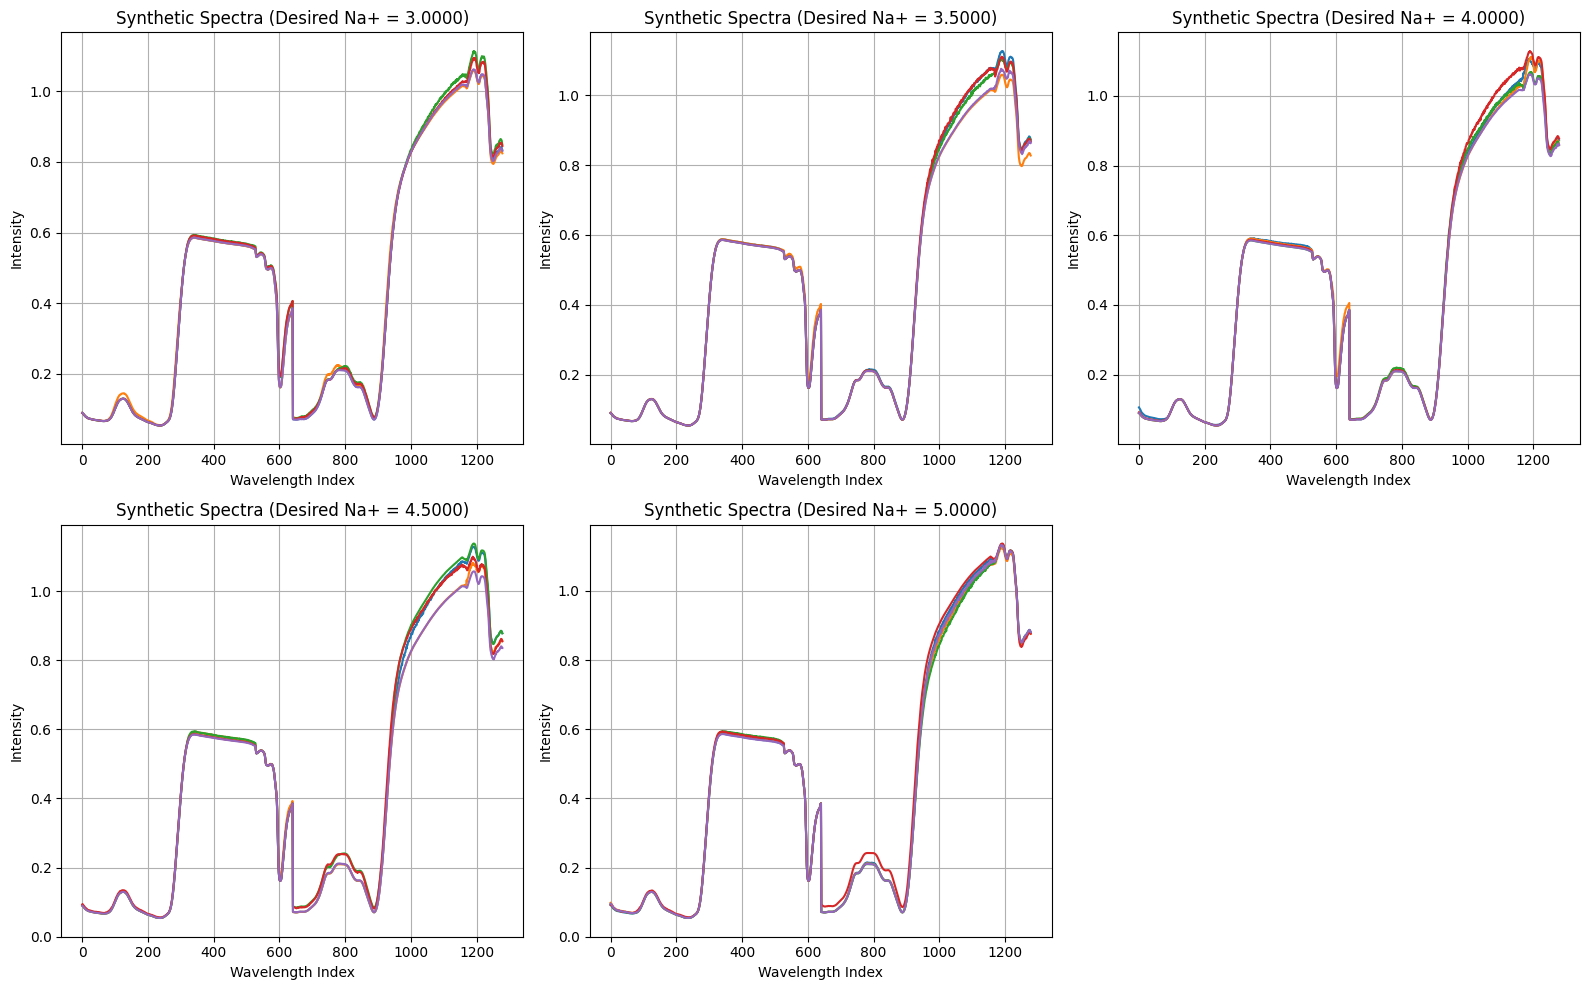


Visualizing mean synthetic spectra for each desired Na+ vs Original Mean...


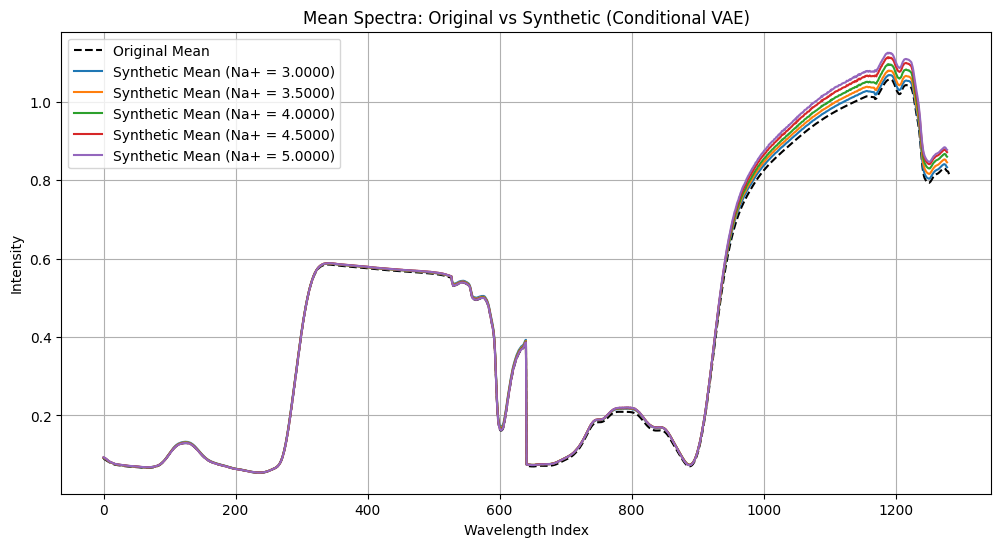


Similarity Metrics (Mean Spectra):
  Desired Na+ = 3.0000: MAE of Means = 0.0062, Correlation of Means = 1.0000 (Spectra subset)
  Desired Na+ = 3.5000: MAE of Means = 0.0087, Correlation of Means = 0.9999 (Spectra subset)
  Desired Na+ = 4.0000: MAE of Means = 0.0116, Correlation of Means = 0.9998 (Spectra subset)
  Desired Na+ = 4.5000: MAE of Means = 0.0150, Correlation of Means = 0.9996 (Spectra subset)
  Desired Na+ = 5.0000: MAE of Means = 0.0174, Correlation of Means = 0.9994 (Spectra subset)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr # Assuming this is needed for similarity metrics

# Assuming generated_data_by_na_plus is available from the previous cell (ff77c310)
# Assuming original_spectra_denorm is available from previous cells for comparison

print("Evaluating generated synthetic data from Conditional VAE...")

# 1. Check the range of generated Na+ values for each desired Na+ input
print("\nRange of Generated Na+ values for each desired Na+:")
for desired_na_plus, data in generated_data_by_na_plus.items():
    synthetic_additional_denorm = data['synthetic_additional_denorm']
    generated_na_plus = synthetic_additional_denorm[:, 2] # Na+ is the 3rd column

    min_generated_na_plus = np.min(generated_na_plus)
    max_generated_na_plus = np.max(generated_na_plus)
    mean_generated_na_plus = np.mean(generated_na_plus)

    print(f"Desired Na+ = {desired_na_plus:.4f}: Generated Range [{min_generated_na_plus:.4f}, {max_generated_na_plus:.4f}], Mean: {mean_generated_na_plus:.4f}")


# 2. Visualize synthetic spectra conditioned on different Na+ values
print("\nVisualizing synthetic spectra conditioned on different Na+ values...")

plt.figure(figsize=(16, 10))

# Select a few samples to plot for each desired Na+ value
num_samples_to_plot = 5

for i, (desired_na_plus, data) in enumerate(generated_data_by_na_plus.items()):
    synthetic_spectra_denorm = data['synthetic_spectra_denorm']

    # Plot a few generated spectra for this desired Na+ value
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    for j in range(min(num_samples_to_plot, synthetic_spectra_denorm.shape[0])):
        plt.plot(synthetic_spectra_denorm[j, :], label=f'Sample {j+1}')

    plt.title(f'Synthetic Spectra (Desired Na+ = {desired_na_plus:.4f})')
    plt.xlabel('Wavelength Index')
    plt.ylabel('Intensity')
    plt.grid(True)
    # plt.legend() # Too many lines, legend can clutter the plot

plt.tight_layout()
plt.show()


# Optional: Visualize the mean spectrum for each desired Na+ and compare to the original mean
print("\nVisualizing mean synthetic spectra for each desired Na+ vs Original Mean...")

plt.figure(figsize=(12, 6))

# Calculate and plot the mean original spectrum
if 'original_spectra_denorm' in locals() and original_spectra_denorm is not None:
    original_mean_spectrum = np.mean(original_spectra_denorm, axis=0)
    plt.plot(original_mean_spectrum, label='Original Mean', linestyle='--', color='black')
else:
    print("Original spectra data not available for comparison.")


# Calculate and plot the mean synthetic spectrum for each desired Na+
for desired_na_plus, data in generated_data_by_na_plus.items():
    synthetic_spectra_denorm = data['synthetic_spectra_denorm']
    synthetic_mean_spectrum = np.mean(synthetic_spectra_denorm, axis=0)
    plt.plot(synthetic_mean_spectrum, label=f'Synthetic Mean (Na+ = {desired_na_plus:.4f})')

plt.title('Mean Spectra: Original vs Synthetic (Conditional VAE)')
plt.xlabel('Wavelength Index')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()


# Optional: Calculate similarity metrics (e.g., MAE, Correlation) between mean spectra
print("\nSimilarity Metrics (Mean Spectra):")
if 'original_mean_spectrum' in locals():
    for desired_na_plus, data in generated_data_by_na_plus.items():
        synthetic_mean_spectrum = np.mean(data['synthetic_spectra_denorm'], axis=0)
        # Ensure original_mean_spectrum is sliced to match the shape of synthetic_mean_spectrum
        if original_mean_spectrum.shape[0] == synthetic_mean_spectrum.shape[0]:
             mae_mean = np.mean(np.abs(original_mean_spectrum - synthetic_mean_spectrum))
             corr_mean, _ = pearsonr(original_mean_spectrum, synthetic_mean_spectrum)
             print(f"  Desired Na+ = {desired_na_plus:.4f}: MAE of Means = {mae_mean:.4f}, Correlation of Means = {corr_mean:.4f}")
        elif original_mean_spectrum.shape[0] > synthetic_mean_spectrum.shape[0]:
             # Assuming the synthetic spectra corresponds to the beginning of the original spectra
             mae_mean = np.mean(np.abs(original_mean_spectrum[:synthetic_mean_spectrum.shape[0]] - synthetic_mean_spectrum))
             corr_mean, _ = pearsonr(original_mean_spectrum[:synthetic_mean_spectrum.shape[0]], synthetic_mean_spectrum)
             print(f"  Desired Na+ = {desired_na_plus:.4f}: MAE of Means = {mae_mean:.4f}, Correlation of Means = {corr_mean:.4f} (Spectra subset)")
        else:
             print(f"  Desired Na+ = {desired_na_plus:.4f}: Cannot calculate similarity metrics due to incompatible shapes.")


else:
    print("Original mean spectrum not available for similarity metric calculation.")

**Reasoning**:
The traceback indicates a shape mismatch during denormalization. The generated synthetic spectra has a shape of (1000, 1279), but the `reconstructed_combined_std_np` and `reconstructed_combined_mean_np` have shapes of (1282,). This is because the original `reconstructed_combined` included both fresh and dried spectra (1282 features), while the VAE decoder in this case was trained to output only the spectra part (1279 features, as the last 3 features for additional data were removed before training). I need to use the mean and standard deviation corresponding only to the spectra part of the original data for denormalization.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter # Import for smoothing
from scipy.stats import pearsonr # Import for correlation


# Assuming 'original_spectra' and 'synthetic_spectra' are available from previous cells
# If not, you might need to load them, e.g., from the .npz file saved previously.
# For this code, we assume they are in the current environment.

print("Applying smoothing to synthetic spectra...")

# Define smoothing parameters (adjust window_length and polyorder as needed)
# These values should ideally be chosen based on the characteristics of your data
# and the desired level of smoothing, potentially by analyzing the original data.
# Using different parameters for fresh and dried spectra to address the range issue in fresh spectra
window_length_fresh = 20 # Adjusted window length for fresh spectra (increased)
polyorder_fresh = 3      # Adjusted polynomial order for fresh spectra

window_length_dried = 20 # Adjusted window length for dried spectra (increased)
polyorder_dried = 3      # Original polynomial order for dried spectra


# Apply Savitzky-Golay filter to each synthetic spectrum
synthetic_spectra_smoothed = np.zeros_like(synthetic_spectra)

for i in range(synthetic_spectra.shape[0]):
    # Apply smoothing to fresh and dried parts separately with different parameters
    synthetic_fresh_smoothed = savgol_filter(synthetic_spectra[i, :641], window_length_fresh, polyorder_fresh)
    synthetic_dried_smoothed = savgol_filter(synthetic_spectra[i, 641:], window_length_dried, polyorder_dried)

    synthetic_spectra_smoothed[i, :641] = synthetic_fresh_smoothed
    synthetic_spectra_smoothed[i, 641:] = synthetic_dried_smoothed


print(f"Shape of synthetic_spectra_smoothed: {synthetic_spectra_smoothed.shape}")

# --- Visualize Smoothed Synthetic vs Original Spectra (Sample) ---
plt.figure(figsize=(14, 6))

# Fresh Spectra Comparison
plt.subplot(1, 2, 1)
plt.plot(original_spectra_denorm[0, :641], label='Original Fresh')
plt.plot(synthetic_spectra_smoothed[0, :641], label='Smoothed Synthetic Fresh')
plt.title('Fresh Spectra: Original vs Smoothed Synthetic (Sample 0)')
plt.xlabel('Wavelength Index')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)

# Dried Spectra Comparison
plt.subplot(1, 2, 2)
plt.plot(original_spectra_denorm[0, 641:], label='Original Dried')
plt.plot(synthetic_spectra_smoothed[0, 641:], label='Smoothed Synthetic Dried')
plt.title('Dried Spectra: Original vs Smoothed Synthetic (Sample 0)')
plt.xlabel('Wavelength Index')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Calculate and Plot Similarity Metrics for Smoothed Spectra ---
print("\n=== SIMILARITY METRICS (Smoothed Synthetic Spectra) ===")

# Helper function to calculate metrics (reusing the one defined in the previous cell)
# If the previous cell hasn't been run, you might need to define this function here.
# For this execution, we assume calculate_spectra_metrics is available.
try:
    calculate_spectra_metrics
except NameError:
    print("Warning: calculate_spectra_metrics function not found. Skipping similarity metrics calculation.")
    # Define it here if needed, or ensure the previous cell is run first.
    def calculate_spectra_metrics(original_spectra, synthetic_spectra, label):
        original_mean = np.mean(original_spectra, axis=0)
        synthetic_mean = np.mean(synthetic_spectra, axis=0)
        original_std = np.std(original_spectra, axis=0)
        synthetic_std = np.std(synthetic_spectra, axis=0)

        mae_mean = np.mean(np.abs(original_mean - synthetic_mean))
        mae_std = np.mean(np.abs(original_std - synthetic_std))

        corr_mean, _ = pearsonr(original_mean, synthetic_mean)
        corr_std, _ = pearsonr(original_std, synthetic_std)

        # Check if synthetic samples are within original range (simplified check per wavelength)
        original_min_per_wl = np.min(original_spectra, axis=0)
        original_max_per_wl = np.max(original_spectra, axis=0)
        in_range_per_sample = np.all((synthetic_spectra >= original_min_per_wl) & (synthetic_spectra <= original_max_per_wl), axis=1)
        in_range_percentage = np.mean(in_range_per_sample) * 100


        print(f"{label} Spectra Comparison:")
        print(f"  MAE of Means: {mae_mean:.4f}")
        print(f"  MAE of Std: {mae_std:.4f}")
        print(f"  Correlation of Means: {corr_mean:.4f}")
        print(f"  Correlation of Std: {corr_std:.4f}")
        print(f"  Samples within original range (per wavelength check): {in_range_percentage:.1f}%")


# Calculate and print metrics for fresh and dried spectra separately
calculate_spectra_metrics(original_spectra_denorm[:, :641], synthetic_spectra_smoothed[:, :641], 'Fresh (Smoothed)')
calculate_spectra_metrics(original_spectra_denorm[:, 641:], synthetic_spectra_smoothed[:, 641:], 'Dried (Smoothed)')

# Optional: Save the smoothed synthetic data
# np.savez('synthetic_spectra_smoothed.npz', synthetic_spectra_smoothed=synthetic_spectra_smoothed)
# print('Smoothed synthetic spectra saved to synthetic_spectra_smoothed.npz')